# NOTEBOOK: **Linear Regression** and **Logistic Regression** on Heart Disease Dataset
### The dataset has been downloaded from [kaggle](https://www.kaggle.com/datasets/belsonraja/heart-disease-prediction/) link
**Author** : Shahid Umar\
**Date Created** : 17 December, 2023\
**Email** : sshahidumarr@gmail.com

---
# <span style="color:yellow;">**LINEAR REGRESSION MODEL**</span>
---

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import data from heart_disease file through PANDAS
df = pd.read_csv('../01_datasets/heart_disease_prediction.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Basic Information After Explorations the Data

1. This dataset contains 14 columns
2. The dataset has only numeric variables
3. There are 13 integer variables and only one variable is float
4. There are 303 entries in dataset
5. There are no missing value found
6. Each Column representation
   - <span style="color:green;">**age:**</span>   in years
   - <span style="color:green;">**sex:**</span>   gender male=1 & femal=0
   - <span style="color:green;">**cp:**</span>   Chest Pain Type
   - <span style="color:green;">**trestbps:**</span>   Resting Blood Pressure
   - <span style="color:green;">**chol:**</span>   Serum Cholestral
   - <span style="color:green;">**fbs:**</span>   Fasting Blood Suger (1=True & 0=False)
   - <span style="color:green;">**restecg:**</span>   Resting Electrocardiographic Results
   - <span style="color:green;">**thalach:**</span>   Maximum Hear Rate
   - <span style="color:green;">**exang:**</span>   Exercise Induced Angina (1=Yes & 0=No)
   - <span style="color:green;">**oldpeak:**</span>   ST depression induced by exercise relative to rest
   - <span style="color:green;">**slope:**</span>   The Slope of Peak Exercise ST Segment (0=upsloping, 1=flat, 2=downsloping)
   - <span style="color:green;">**ca:**</span>   Number of Major Vessels (0-3) colored by flourosopy
   - <span style="color:green;">**thal:**</span>    0=error, 1=fixed defect, 2=normal, 3=reversable defect
   - <span style="color:green;">**target:**</span>    Confirmation (0=No Disease, 1=Disease Found)
7. These columns contains multiple unique values
   - age, trestbps, chol, thalach, oldpeak

In [6]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

<Axes: xlabel='chol', ylabel='Count'>

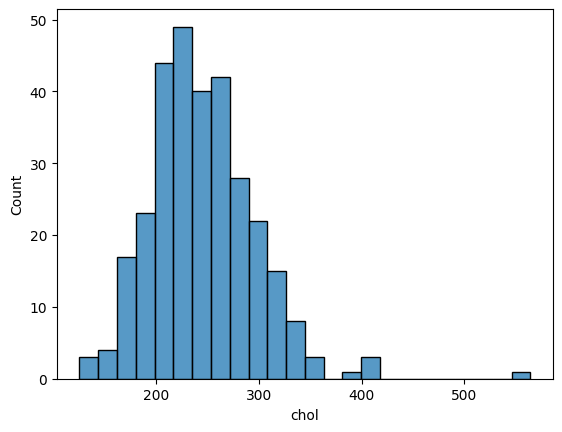

In [8]:
# This plot show the normal distribution
sns.histplot(df['chol'])

<Axes: xlabel='trestbps', ylabel='age'>

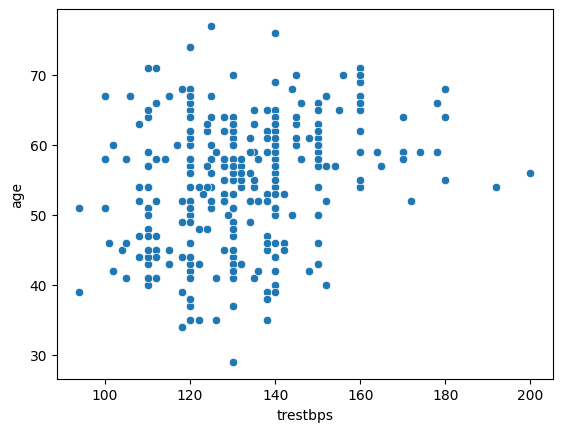

In [9]:
sns.scatterplot(x='trestbps', y='age', data=df)

In [10]:
# split the data into X and y
X = df[['trestbps']]
# scalar = MinMaxScaler()
# X = scalar.fit_transform(X)
y = df['age']

- This model doesn't require scaling becuase on scaling this model returns very age values

In [11]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# call the model
model = LinearRegression()

In [13]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

37.15183103358764
[0.12991771]
y =  37.15183103358764 + [0.12991771] * X


In [15]:
# predict
y_pred = model.predict(X_test)

In [16]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
# the higher the R2, the better the model
# the lower the RMSE, the better the model
# the lower the MSE, the better the model

MSE =  70.35294122872081
R2 =  0.12999902189408408
RMSE =  8.387666017952837


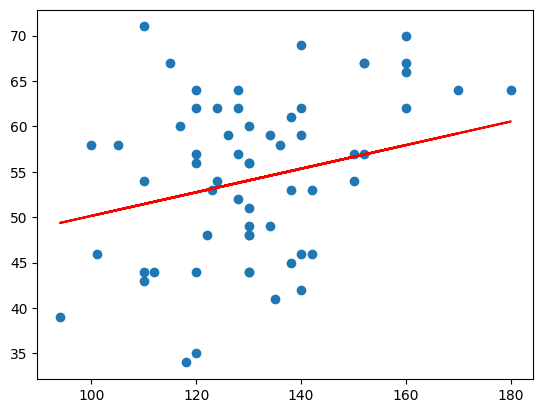

In [17]:
# plot the model and data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [18]:
# Minimum and Maximum Resting Blood Pressure (rbp)
min_rbp = df['trestbps'].min()
max_rbp = df['trestbps'].max()
print(f"Minimum Resting Blood Pressure is : {min_rbp}")
print(f"Maximum Resting Blood Pressure is : {max_rbp}")

Minimum Resting Blood Pressure is : 94
Maximum Resting Blood Pressure is : 200


In [19]:
# Get the predicted "age" from this model by puting different "Resting Blood Pressure" values
model.predict([[60]])

c:\Users\DELL\.conda\envs\Machine_Learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.94689357])

---
# <span style="color:yellow;">**LOGISTIC REGRESSION MODEL**</span>
---

- ##  Libraries already imported at the start of this notebook, so need to import again

In [20]:
# Import data from heart_disease file through PANDAS for df2
df2 = pd.read_csv('../01_datasets/heart_disease_prediction.csv')
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
